# A Stopping Game with Complementarities

### Jaap Abbring, April 2021 (revised November 2022)

Consider an exit game with complementarities between two agents called Dee ($d$) and Mindy ($-d$). For concreteness, suppose that Dee and Mindy are two anchor stores in a dwindling strip mall who complement each other by generating consumer traffic to the mall, but are each pondering to permanently exit. (Alternatively, they could be a couple of smokers who enjoy smoking together, but are considering to quit for health reasons.) 

### Model

Let time $t\in\{1,\ldots\}$ be discrete with infinite horizon. Let $A^j_t=1$ denote that agent $j\in\{d,-d\}$ is active in period $t$ and $A^j_t=0$ that she is not. Both Dee and Mindy are initially active; we make this explicit by denoting $A^d_0=A^{-d}_0=1$.  

At the start of each period $t$, Dee and Mindy know the full history of moves and states (in particular, $A^d_{t-1}$, $A^{-d}_{t-1}$), and first observe scalar state variables $\varepsilon_t(0)$ and $\varepsilon_t(1)$, drawn independently from mean-zero type 1 extreme value distributions. If agent $j\in\{d,-d\}$ was inactive last period ($A^j_{t-1}=0$), she will remain inactive this period ($A^j_{t}=0$) and earn a zero payoff. Otherwise, she can choose to either remain active ($A_t^j=1$) and earn $\beta^j+\delta A^{-j}_t+\varepsilon_t(1)$, or exit ($A_t^j=0$) and earn $\varepsilon_t(0)$. Here, $\beta^d,\beta^{-d}\in\mathbb{R}$ are the baseline payoffs to Dee and Mindy from being active and $\delta\geq 0$ captures the possible (symmetric) complementarities between them. These parameters are commonly known. If Dee and Mindy were both active last period, they move simultaneously this period. 

Dee and Mindy use pure strategies that maximize their expected payoffs, discounted with a factor $\rho\in[0,1)$, in Markov-perfect equilibrium (MPE).

### Equilibrium Analysis

If agent $j$ decides on remaining active in period $t$, her payoff-relevant state is $\left(A^{-j}_{t-1},\varepsilon_t\right)$, where $\varepsilon_t\equiv\left(\varepsilon_t(0),\varepsilon_t(1)\right)$. A pure Markov strategy $\alpha^j:\{0,1\}\times\mathbb{R}^2\rightarrow\{0,1\}$ maps this state into either exit ($0$) or survival ($1$). Note that we focus on a stationary strategy because time $t$ is not payoff relevant. An MPE is a subgame-perfect equilibrium in Markov strategies.

#### Auxiliary single-agent optimal stopping problem

Our construction of candidate MPE strategy profiles $(\alpha^d,\alpha^{-d})$ makes intuitive use of the solution to a single-agent optimal stopping problem in which the agent earns $\xi+\varepsilon_t(1)$ in each period $t$ in which she is active, for some $\xi\in\mathbb{R}$, and that is otherwise the same as the Dee's or Mindy's decision problem in our game. 

In this auxiliary problem, the optimal value of continuing, measured just after taking this decision and before period $t$'s payoffs accrue, is $U_\xi+\varepsilon_t(1)$, with $U_\xi$ the unique fixed point of the smoothed Bellman operator

$$U\mapsto \Psi_\xi(U)\equiv\xi+\rho\log(1+\exp(U)).$$

Note that we have used the analytic expression for McFadden's social surplus in the logit case. The corresponding optimal decision rule $\alpha_\xi:\mathbb{R}^2\rightarrow\{0,1\}$ is 

$$\alpha_\xi\left(\varepsilon_t\right)=I\left(U_\xi+\varepsilon_t(1)>\varepsilon_t(0)\right),$$

where $I(\cdot)=1$ if $\cdot$ is true, and $0$ otherwise. Note that we have selected the decision rule that "defaults to inactivity" in the sense that it prescribes exit whenever the agent is indifferent. We could construct other optimal decision rules by varying the way ties are resolved, but this is not of substantial interest, because ties occur with zero probability. Throughout, we will restrict attention to decision rules and MPE strategies that default to inactivity this way.

---
*Exercises: Properties of the auxiliary optimal stopping problem*

1. *Prove that, for any $\xi\in\mathbb{R}$, $\Psi_\xi$ has a unique fixed point $U_\xi$.*

2. *Prove that $U_\xi<U_{\xi'}$ if $\xi<\xi'$.*
---
We first save a function `bellman` that codes up $\Psi_\xi$, with an input `xi` for the value of $\xi$ (the discount factor `rho` is a global variable). 

In [2]:
%%file code/bellman.m

function Uout=bellman(U,xi)
global rho
    Uout=xi+rho*log(1+exp(U));
end

Created file '/Users/jaap/sandbox/dynamic-economic-models/lectures/games/code/bellman.m'.


We also save a function `solveP` that can be used to find the fixed point $U_\xi$ of $\Psi_\xi$ by value iteration.

In [3]:
%%file code/solveP.m

function Unew=solveP(f)
    tol=1E-9;
    Unew=0;
    Uold=Unew+2*tol;
    while max(abs(Uold-Unew))>tol
        Uold=Unew;
        Unew=f(Uold);
    end
end


Created file '/Users/jaap/sandbox/dynamic-economic-models/lectures/games/code/solveP.m'.


For each $j\in\{d,-d\}$, we are particularly interested in $U_\xi$ and $\alpha_\xi$ for values of $\xi$ that give the stopping problem agent $j$ would solve if agent $-j$ would never ($\beta^j$) or always ($\beta^j+\delta$) be active. Without loss of generality, suppose that Dee has lower base payoff than Mindy: $\beta^d\leq\beta^{-d}$ (in the code, we will use the suggestive variable names `betaL` for the lowest and `betaH` for the highest base payoff). We will calculate solutions to the auxiliary problems for two numerical examples of the model, one in which (A) complementarities are large enough to compensate for the differences between Dee and Mindy, $0.50=\delta\geq\beta^{-d}-\beta^{d}=0.30$, and one in which (B) heterogeneity trumps complementarities, $0.25=\delta<\beta^{-d}-\beta^d=0.30$. 

In [4]:
global rho
addpath('code/')
rho = 0.85;
betaH = 0.1;
betaL = -0.2;

delta = 0.5;
xi = [betaL betaH betaL+delta betaH+delta]
U = solveP(@(U)bellman(U,xi))

delta = 0.25;
xi = [betaL betaH betaL+delta betaH+delta]
U = solveP(@(U)bellman(U,xi))


xi =

   -0.2000    0.1000    0.3000    0.6000


U =

    0.7890    1.6564    2.4632    4.0937


xi =

   -0.2000    0.1000    0.0500    0.3500


U =

    0.7890    1.6564    1.4876    2.7014



Note that, as Exercise 2 implies, the value of continuing is larger if agent $j$ benefits from the complementarity: 
$U_{\beta^j+\delta}\geq U_{\beta^j}$. In the first example, the complementarity more than compensates for Dee's lower base payoff: $U_{\beta^d+\delta}\geq U_{\beta^{-d}}$. In the second example, it does not: $U_{\beta^d+\delta}<U_{\beta^{-d}}$.

#### Constructing MPE

Denote the equilibrium value of continuing with $v^j:\{0,1\}\times\mathbb{R}^2\rightarrow\mathbb{R}$. Note that the corresponding equilibrium strategy satisfies
$$\alpha^j\left(A^{-j}_{t-1},\varepsilon_t\right)=I\left(v^j(A^{-j}_{t-1},\varepsilon_t)>\varepsilon_t(0)\right).$$

First, observe that, once agent $j$ enters a period $t$ alone ($A^{j}_{t-1}=1$ and $A^{-j}_{t-1}=0$), she will remain alone in all future periods until she leaves. Therefore, subgame perfection requires that $\alpha^j(0,\varepsilon_t)=\alpha_{\beta^j}(\varepsilon_t)$, with corresponding value $v^j(0,\varepsilon_t)=U_{\beta^j}+\varepsilon_t(1)$. This determines $\alpha^j$ and $v^j$ on $\{0\}\times\mathbb{R}^2$. 

Next, consider Dee and Mindy's equilibrium exit strategies and continuation values when they are both still active ($A^d_{t-1}=A^{-d}_{t-1}=1$): $\alpha^j$ and $v^j$ on $\{1\}\times\mathbb{R}^2$. Note that the equilibrium value
$$v^j(1,\varepsilon_t)=\alpha^{-j}(1,\varepsilon_t)
\left(\beta^j+\delta+\varepsilon_t(1)+\rho\mathbb{E}\max\{v^j(1,\varepsilon_{t+1}),\varepsilon_{t+1}(0)\}\right) +\left(1-\alpha^{-j}(1,\varepsilon_t)\right)v^j(0,\varepsilon_t)$$
is bounded by the optimal values from the auxiliary stopping problem in which agent $-j$ is never around and the one in which she is always around:
$$U_{\beta^j}+\varepsilon_t(1)\leq v^j(1,\varepsilon_t)\leq U_{\beta^j+\delta}+\varepsilon_t(1).$$
We consider the two cases corresponding to numerical examples A and B.

##### A. Complementarity dominates heterogeneity

In the situation of our first example, complementarity dominates heterogeneity: $\beta^d+\delta\geq \beta^{-d}$. In this case, we can pin down the equilibrium strategy for extreme values of $\varepsilon_t$. 
- Suppose that $\varepsilon_t(0)<U_{\beta^{-d}}+\varepsilon_t(1)$. Then, $\varepsilon_t(0)<v^{-d}(1,\varepsilon_t)$, so that $\alpha^{-d}(1,\varepsilon_t)=1$ (survival dominates). Moreover, as Dee could adopt the rule to continue if $\varepsilon_t(0)<U_{\beta^{-d}}+\varepsilon_t(1)$ and exit otherwise, $v^d(1,\varepsilon_t)\geq U_{\beta^{-d}}+\varepsilon_t(1)>\varepsilon_t(0)$. Consequently, $\alpha^{d}(1,\varepsilon_t)=1$ as well and neither firm leaves.
- Suppose that $\varepsilon_t(0)\geq U_{\beta^{d}+\delta}+\varepsilon_t(1)$. Then, $\varepsilon_t(0)\geq v^{d}(1,\varepsilon_t)$, so that $\alpha^{d}(1,\varepsilon_t)=0$ (exit dominates). In turn, this implies that $v^{-d}(1,\varepsilon_t)=v^{-d}(0,\varepsilon_t)=U_{\beta^{-d}}+\varepsilon_t(1)\leq U_{\beta^{d}+\delta}+\varepsilon_t(1)\leq\varepsilon_t(0)$, so that $\alpha^{-d}(1,\varepsilon_t)=0$ as well and neither firm stays.

This establishes that $\alpha^{d}(1,\varepsilon_t)=\alpha^{-d}(1,\varepsilon_t)=1$ if $\varepsilon_t(0)<U_{\beta^{-d}}+\varepsilon_t(1)$ and that $\alpha^{d}(1,\varepsilon_t)=\alpha^{-d}(1,\varepsilon_t)=0$ if $\varepsilon_t(0)\geq U_{\beta^{d}+\delta}+\varepsilon_t(1)$. With this in hand, we can construct multiple MPE by varying strategies on the set of remaining states, the $(1,\varepsilon_t)$ such that $U_{\beta^{-d}}+\varepsilon_t(1)\leq\varepsilon_t(0)<U_{\beta^{d}+\delta}+\varepsilon_t(1)$. We construct two extreme such MPE (and leave a fuller analysis for the exercises). 
- An MPE with mimimal activity arises if $\alpha^{d}(1,\varepsilon_t)=\alpha^{-d}(1,\varepsilon_t)=0$ on the remaining set of states. Note that $v^j(1,\varepsilon_t)=v^j(0,\varepsilon_t)=U_{\beta^j}+\varepsilon_t(1)\leq U_{\beta^{-d}}+\varepsilon_t(1)\leq \varepsilon_t(0)$ in these states, so that neither firm would benefit from deviating. 
- An MPE with maximal activity arises if $\alpha^{d}(1,\varepsilon_t)=\alpha^{-d}(1,\varepsilon_t)=1$ on the remaining set of states. Note that $v^{-d}(1,\varepsilon_t)\geq v^d(1,\varepsilon_t)=U_{\beta^d+\delta}+\varepsilon_t(1)>\varepsilon_t(0)$ in these states, so that neither firm would benefit from deviating.

Intuitively, the second MPE maximizes the complementarities that Dee and Mindy enjoy. Exercise 3 asks you to show that this MPE is _efficient_ in the sense that it is the MPE in which Dee and Mindy enjoy the highest sum of expected discounted profits. Exercise 4 establishes that it is the unique efficient MPE.

##### B. Heterogeneity dominates complementarity

Alternatively, suppose that heterogeneity dominates complementarity, as in our second example: $\beta^d+\delta<\beta^{-d}$. Then, $v^{-d}(1,\varepsilon_t)\geq U_{\beta^{-d}}+\varepsilon_t(1)\geq U_{\beta^d+\delta}+\varepsilon_t(1)$, so that Mindy continues in all states such that $U_{\beta^d+\delta}+\varepsilon_t(1)>\varepsilon_t(0)$ (survival dominates). Also, Dee never continues in the complementary case that $U_{\beta^d+\delta}+\varepsilon_t(1)\leq\varepsilon_t(0)$ (exit dominates). This implies that Dee effectively solves the auxiliary problem in which Mindy is always around, so that $v^d(1,\varepsilon_t(1))=U_{\beta^d+\delta}+\varepsilon_t(1)$ and $\alpha^d(1,\varepsilon_t)=\alpha_{\beta^d+\delta}(\varepsilon_t)$, and Mindy will act as if she is alone, $\alpha^{-d}(1,\varepsilon_t)=\alpha_{\beta^{-d}}(\varepsilon_t)$. 

---
*Exercises: Verification and uniqueness of the efficient MPE*

3. *Verify that the MPE with maximal activity is indeed efficient.*

4. *Briefly reflect whether there is a unique efficient MPE (that defaults to inactivity).*

*Exercise: Existence of MPE that are not efficient*

5. *Give an example of an MPE that is not efficient. (Hint: For a simple example, consider the case in which $\beta^d=\beta^{-d}$ and $\delta>0$.)*

*Exercises: Synchronization in the efficient MPE*

6. *For both numerical examples, A and B, characterize the efficient MPE exit outcomes (that is, describe the implied exit behavior in relation to the path of payoff shocks $\varepsilon_t$). Make sure to use the numbers above and carefully consider if and when Dee and Mindy synchronize their exits.*

7. *Similary, characterize the equilibrium exit outcomes for arbitrary parameter values $\beta^d$, $\beta^{-d}$, $\delta$, and $\rho$. As in the numerical examples, distinguish between specifications in which $\delta\geq\beta^{-d}-\beta^d$ and in which $\delta<\beta^{-d}-\beta^d$.*

---

### Empirical Implementation

Now suppose we observe a random sample of exit games $g=1,\ldots,\check{g}$ like Dee and Mindy's. These $\check{g}$ games share a common discount factor $\rho$ and complementarity parameter $\delta$. However, their baseline payoffs $\beta^d_g$ and $\beta^{-d}_g$  are drawn independently (as if agents were randomly matched) from normal distributions with common mean $\mu$ and variance $\sigma^2$ (note that we no longer assume that $\beta^d_g\leq \beta^{-d}_g$). Moreover, they are hit by independent payoff shocks $\varepsilon_{g,t}$. We assume that, in each game $g$, the agents play the above efficient MPE strategies and we observe the corresponding exit times. Note that there are two sources of sample variation in these times: the payoff shocks $\varepsilon_{g,t}$ and the baseline payoffs $\beta^d_g$ and $\beta^{-d}_g$.

We will simulate data for a specification of this econometric model, implement a nested fixed point maximum likelihood estimator of its parameters (except $\rho$, which we will fix at its true value), and apply this estimator to the simulated data. 

#### Simulating data 

Our data simulation requires a function `logit` that calculates $x\mapsto\exp(x)/\left(1+\exp(x)\right)$.

In [5]:
%%file code/logit.m

function p=logit(x)
    p=exp(x)./(1+exp(x));
end

Created file '/Users/jaap/sandbox/dynamic-economic-models/lectures/games/code/logit.m'.


The function `simdata` simulates data from the efficient MPE in `gCheck` ($\check{g}$) games with parameters `mu` ($\mu$), `sigma` ($\sigma$), and `delta` ($\delta$) over `tCheck` ($\check{t}$) time periods. The data are returned in a $(\check{t}+1)\times\check{g}$ matrix `nFirms`, which has the number of active firms in game $g$ at time $t-1$ in its $(t,g)$-th entry. Note that the first row of this matrix contains only $2$s, as this is the initial number of active agents in each game. Recall that we use the global value of `rho` ($\rho$) throughout. 

In [6]:
%%file code/simdata.m

function nFirms=simdata(gCheck,tCheck,mu,sigma,delta)
global rho
    beta=mu+sigma*randn(2,gCheck);
    betaH=max(beta);
    betaL=min(beta);

    pH=logit(solveP(@(U)(bellman(U,betaH))));
    pL=logit(solveP(@(U)(bellman(U,betaL+delta))));
    
    unif = rand(tCheck,gCheck);
    stayL = unif<pL;
    stayH = unif<pH;

    nFirms = 2*ones(1,gCheck);
    for t=1:tCheck
        S = nFirms(t,:);
        S(S==2) = 1+stayL(t,S==2);
        S(S==1) = stayH(t,S==1);
        nFirms=[nFirms;S];
    end
end

Created file '/Users/jaap/sandbox/dynamic-economic-models/lectures/games/code/simdata.m'.


We use `simdata` to simulate $\check{g}=10000$ games with parameters $\mu=-0.20$, $\sigma^2=0.30^2$, and $\delta=0.25$ over $\check{t}=10$ time periods.

In [7]:
rng(230670)
delta=0.25;
mu = -0.2;
sigma = 0.3;

nFirms=simdata(10000,10,mu,sigma,delta);

#### Estimation

Exactly calculating the model's likelihood requires that we compute the efficient MPE for each possible value of $(\beta^d_g,\beta^{-d}_g)$, construct the implied probability of observing each game $g$'s outcome path, and integrate each of these probabilities over the distribution of $(\beta^d_g,\beta^{-d}_g)$. Because $(\beta^d_g,\beta^{-d}_g)$ is continuously distributed, this is not feasible. One computationally feasible approach would be to numerically integrate over $(\beta^d_g,\beta^{-d}_g)$, which would reduce the integral to a sum over finitely many values of $(\beta^d_g,\beta^{-d}_g)$. 

We will instead adopt an approach that is natural in applications in which we are not sure about the true distribution of $(\beta^d_g,\beta^{-d}_g)$. We will maximize the likelihood of a version of the model in which the normal distribution of $(\beta^d_g,\beta^{-d}_g)$ is replaced with a finitely discrete distribution. This discrete distribution can either be parameterized in terms of $\mu$ and $\sigma^2$ to approximate the original model's normal distribution or kept unrestricted. Either way, the procedure directly provides estimates of the key complementarity parameter, $\delta$. In the first approach, it also provides estimates of $\mu$ and $\sigma$ (in fact, this approach can be interpreted as one implementation of numerical integration with respect to the normal distribution). We adopt the second approach, because this is simpler to code up and works well. This approach does not directly produce estimates of $\mu$ and $\sigma^2$, but we will construct these in a second step from the estimated discrete distribution. 

We first store a function `negLogLik` that calculates minus the log likelihood of the parameters of the discrete distribution of $(\beta^d_g,\beta^{-d}_g)$ (inputted as `parq` and `parx`) and $\ln(\delta)$ (`pard`), given `data` in the form outputted by `simdata`. Note that we store the support points of $\beta^j_g$ in a column vector `x` and the corresponding probabilities in a vector `q` of the same dimensions.

In [8]:
%%file code/negLogLik.m

function nll=negLogLik(data,parq,parx,pard)
    gCheck=size(data,2);
    x=cumsum([parx(1);exp(parx(2:end))]);
    q=[exp(parq);1];
        q=q/sum(q);
        q=q.*q';
        q=q(:);
    nHet=size(x,1);
    v=repmat(x,1,nHet);
    xH=max(x,x');
        xH=xH(:)';
    xL=min(x,x');
        xL=xL(:)';
    delta=exp(pard);    
    pL=logit(solveP(@(U)(bellman(U,xL+delta))));
    pH=logit(solveP(@(U)(bellman(U,xH))));
    p22=pL;
    p21=max(pH-pL,0);
    p20=1-p22-p21;
    p11=pH;
    p10=1-pH;
    nll=0;    
    for n=1:gCheck
        ly=data(1:end-1,n);
        nw=data(2:end,n);
        lik=(ly==2).*((nw==2).*p22+(nw==1).*p21+(nw==0).*p20)+...
            (ly==1).*((nw==1).*p11+(nw==0).*p10)+...
            (ly==0).*ones(1,nHet^2);
        nll=nll-log(prod(lik)*q);
    end    
end

Created file '/Users/jaap/sandbox/dynamic-economic-models/lectures/games/code/negLogLik.m'.


Next, we estimate these parameters by minimizing the negative log likelihood specified in `negLogLik`. We store the estimates of the discrete distribution of $\beta^j_g$ in `qhat` and `xhat` and the estimate of $\delta$ in `deltahat`.

In [9]:
parx = [-1;repmat(log(0.2),10,1)];
    nHet = size(parx,1);
parq = zeros(nHet-1,1);
pard = log(0.2);
parzero =[parq;parx;pard];
OptimizerOptions = optimset('Display','iter',...
                            'MaxFunEvals',100000, ...
                            'MaxIter',1000);

[parhat,nll,exitflag]=fminunc(@(par)negLogLik(nFirms,par(1:nHet-1),...
            par(nHet:end-1),par(end)),parzero,OptimizerOptions)

parqhat=parhat(1:nHet-1);
parxhat=parhat(nHet:end-1);
pardhat=parhat(end);

disp('qhat, xhat, and deltahat')
qhat=[exp(parqhat);1];
    qhat=qhat/sum(qhat)      
xhat=cumsum([parxhat(1);exp(parxhat(2:end))])
deltahat=exp(pardhat)

                                                        First-order 
 Iteration  Func-count       f(x)        Step-size       optimality
     0          23          33235.8                      6.38e+03
     1          69          31485.6     4.4948e-05       1.32e+03  
     2          92          31149.2              1        1.7e+03  
     3         115            30153              1       4.81e+03  
     4         161          29457.7        0.45988        2.6e+03  
     5         184            29340              1            970  
     6         207          29324.9              1            450  
     7         230          29318.6              1            187  
     8         253          29306.7              1            211  
     9         276            29280              1            610  
    10         299          29243.7              1            579  
    11         322          29223.5              1           74.6  
    12         345          29221.1              

We can partially check whether our simulated data are informative about the key complementarity parameter, $\delta$, by plotting the log likelihood as a function of $\delta$ at the estimated distribution of $\beta^j_g$. 

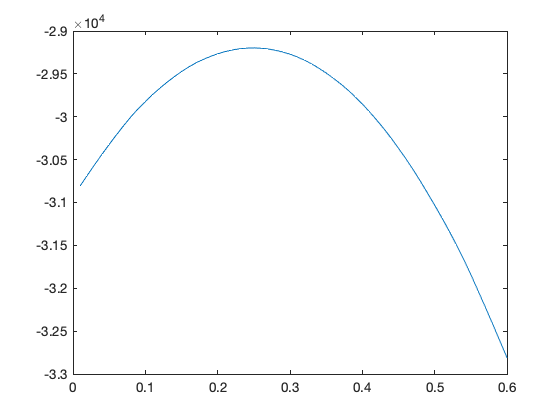

In [10]:
l=[];
for d=0.01:0.01:0.6
    l=[l;negLogLik(nFirms,parqhat,parxhat,log(d))];
end
plot(0.01:0.01:0.6,-l)

For a more complete assessment of the information in the simulated data about $\delta$ (and the model's other parameters), we could estimate the information matrix using the Hessian of the log likelihood and calculate asymptotic standard errors. As this is routine, we will not pursue this here.

Our estimation method recovers the key payoff parameters, including the degree of complementarity, well, despite formally misspecifying the normal distribution of $\beta^j_g$ as finitely discrete. What obviously helps here is that a fine enough discrete distribution can approximate the true normal cumulative distribution of $\beta^j_g$ arbitrarily well. We can easily check that the estimated discrete distribution of $\beta^j_g$ has a mean and standard deviation close to the parameters $\mu$ and $\sigma$ of the normal distribution used to simulate the data, and indeed closely tracks that distribution. 

mu and sigma
   -0.2000    0.3000

muhat and sigmahat
   -0.1981    0.2939



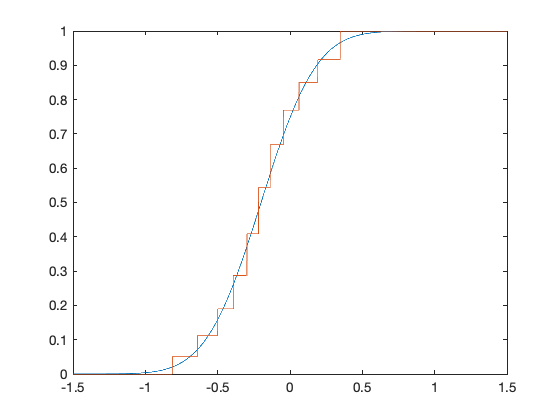

In [11]:
disp('mu and sigma')
disp([mu sigma])
disp('muhat and sigmahat')
muhat=xhat'*qhat;
sigmahat=sqrt(((xhat-xhat'*qhat).^2)'*qhat);
disp([muhat sigmahat])

x=-1.5:0.001:1.5;
nrm=normcdf((x-mu)/sigma);
dis=sum(repmat(qhat,1,size(x,2)).*(xhat<=x));
plot(x,[nrm;dis])

---
*Exercise: Identification of complementarities*

8. *Suppose that couples do not match randomly, but assortively, so that $\beta^d_g$ and $\beta^{-d}_g$ are no longer independent, but positively associated across games $g$ (for example, avid smokers may seek partners who are similarly eager to smoke). Briefly discuss how this affects (i) each game's equilibrium analysis and (ii) the identification of complementarities ($\delta$).*

*Exercise: An alternative game*

9. *Consider a finite horizon version of the game in which, in each period $t$, Dee moves before Mindy (where both continue to observe all past actions, including those in the same period). Briefly (!) discuss MPE existence, uniqueness, and computation in this alternative game.*

---